# Business Understanding

## Problem
'X' Corp had a 16 percent attrition rate, while similar companies had a 10.9 percent attrition rate. This is not good because a high attrition rate implies more resources for hiring and training new employees. Furthermore, it will increase the workload of the remaining workers and cause many projects to also be delayed. <br>

## Goals
Reduce employee attrition<br>

## Objective
* Understanding the factors that most influence attrition rates in this company. <br>
* Making recommendations on what companies can do to reduce attrition rates. <br>

## Business Metrics
Attrition Rate

$\textbf{Tri Umiati}$ <br>
Email : triumi28@gmail.com<br>
Phone : +6285720225575<br>
LinkedIn : www.linkedin.com/in/tri-umiati-149b59194<br>
Github : https://github.com/TriUmiati/TriUmiati
<br>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import LabelEncoder,StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc


# Load and Describe Data

## Load Data

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
attrition = df.copy()
attrition.sample(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1383,36,No,Non-Travel,1351,Research & Development,9,4,Life Sciences,1,1949,...,2,80,0,5,3,3,5,4,0,2
819,28,No,Travel_Rarely,1451,Research & Development,2,1,Life Sciences,1,1136,...,1,80,0,6,2,1,5,3,0,4
608,55,Yes,Travel_Rarely,436,Sales,2,1,Medical,1,842,...,3,80,0,12,3,2,9,7,7,3


## Data Description

In [3]:
print('There is', attrition.shape[0],'rows and', attrition.shape[1],'columns')

There is 1470 rows and 35 columns


In [4]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Check Null and Missing value

In [5]:
attrition.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Check duplicate

In [6]:
attrition.duplicated().sum()

0

This dataset is clean! <br>
Great! <br>
No null, no missing value, and no duplicate. <br>

## Numerical Datatype

In [7]:
print('There is ',attrition.select_dtypes(exclude=['object']).shape[1],'rows of numeric datatype')
print(attrition.select_dtypes(exclude=['object']).columns)
numeric = attrition.select_dtypes(exclude=['object'])
numeric.head(2)

There is  26 rows of numeric datatype
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7


## Non Numerical Datatypes

In [8]:
print('There is ',attrition.select_dtypes(include=['object']).shape[1],'rows of non numeric datatype')
print(attrition.select_dtypes(include=['object']).columns)
non_numeric = attrition.select_dtypes(include=['object'])
non_numeric.head(2)

There is  9 rows of non numeric datatype
Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No


# Data Preparation

## Outliers

Outliers are data points whose values are extreme or much different from other data points in general. <br>

There are several techniques that can be used to detect outliers, one of that is the Inter Quartile Range (IQR) method. IQR tells us the variation in the data set. Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR treated as outliers.<br>

In [9]:
def qr_outliers(col):
    outliers = []
    
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    inter_qr = q3 - q1
    lower_limit = q1 - 1.5 * inter_qr
    upper_limit = q3 + 1.5 * inter_qr
    for val in col:
        if val > upper_limit or val < lower_limit:
            outliers.append(val)
    return outliers

In [10]:
col_outliers = []
for col in attrition.columns:
    if attrition[col].dtype == 'O' : continue
    else : 
        outliers = qr_outliers(attrition[col])
        if outliers != []:
            col_outliers.append(col)
            print(col,':' ,outliers)

MonthlyIncome : [19094, 18947, 19545, 18740, 18844, 18172, 17328, 16959, 19537, 17181, 19926, 19033, 18722, 19999, 16792, 19232, 19517, 19068, 19202, 19436, 16872, 19045, 19144, 17584, 18665, 17068, 19272, 18300, 16659, 19406, 19197, 19566, 18041, 17046, 17861, 16835, 16595, 19502, 18200, 16627, 19513, 19141, 19189, 16856, 19859, 18430, 17639, 16752, 19246, 17159, 17924, 17099, 17444, 17399, 19419, 18303, 19973, 19845, 17650, 19237, 19627, 16756, 17665, 16885, 17465, 19626, 19943, 18606, 17048, 17856, 19081, 17779, 19740, 18711, 18265, 18213, 18824, 18789, 19847, 19190, 18061, 17123, 16880, 17861, 19187, 19717, 16799, 17328, 19701, 17169, 16598, 17007, 16606, 19586, 19331, 19613, 17567, 19049, 19658, 17426, 17603, 16704, 19833, 19038, 19328, 19392, 19665, 16823, 17174, 17875, 19161, 19636, 19431, 18880]
NumCompaniesWorked : [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
Perform

Check unique values for some of these features.

In [11]:
print('NumCompaniesWorked:', attrition.NumCompaniesWorked.unique())
print('StockOptionLevel:', attrition.StockOptionLevel.unique())

NumCompaniesWorked: [8 1 6 9 0 4 5 2 7 3]
StockOptionLevel: [0 1 3 2]


In [12]:
constant_cols = col_outliers[1:4]
col_outliers[1:4] = []
col_outliers

['MonthlyIncome',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

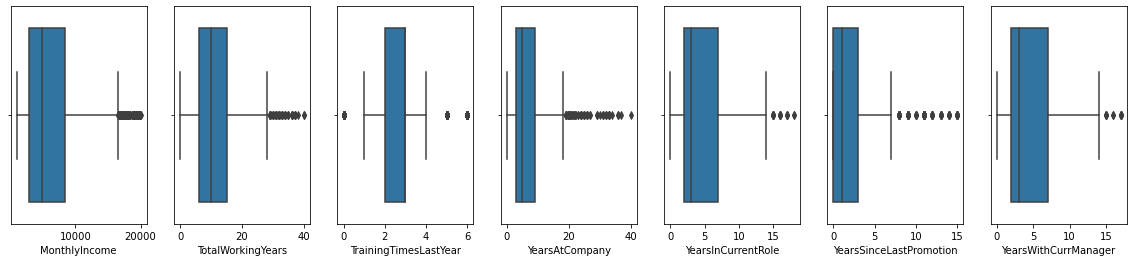

In [13]:
plt.figure(figsize = (20,4))
x = (["",'MonthlyIncome', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
      'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'])
for i in range(1,8):
    plt.subplot(1,7,i)
    sns.boxplot(x = x[i], data=attrition)
plt.show()

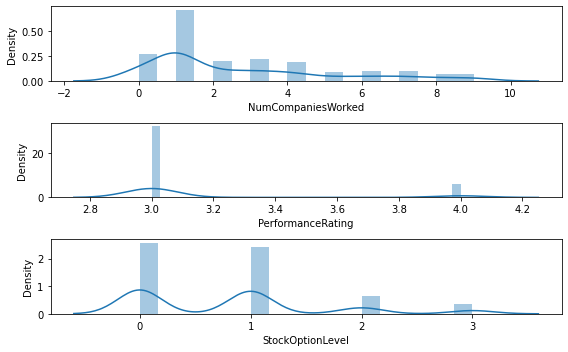

In [14]:
def constant_cols_outliers(cols, df):
    fig, ax = plt.subplots(3,1, figsize = (8, 5))    
    i = 0
    for col in cols:
        sns.distplot(df[col], ax = ax[i])
        i += 1
    fig.tight_layout()
    plt.show()
    
constant_cols_outliers(constant_cols, df)

Outliers have a negative impact on the dataset's mean and standard deviation. These may produce statistically erroneous results. It raises the variance of errors and reduces the power of statistical tests. Outliers can reduce normality if they are not distributed randomly. Most machine learning algorithms perform badly in the presence of an outlier. As a result, detecting and eliminating outliers is desirable. They can also have an effect on the basic assumptions of Regression, ANOVA, and other statistical models.

There are several techniques that can be used to deal with outliers:
1. Deleting observations
2. Transforming values
3. Imputation
4. Separately treating

Due to the small size of the dataset, I decided to handle outliers by transforming values and imputation. I chose Box-Cox transformation for transforming values because it removes no data and, among several other transforming values methods (Scalling, Log transformation, Cube Root Normalization), it produces the best results. The imputation technique will then be used to deal with outliers. We can impute outliers in the same way that we can impute missing values. In this method, we can use the mean, median, and zero value. There is no data loss because we are imputing. In this case, the median is appropriate because it is unaffected by outliers.

In [15]:
# Handle outlier by transforming values (Box-Cox transformation)
for col in col_outliers:
    attrition.loc[attrition[col] > 0, col], fitted_lambda = stats.boxcox(attrition[attrition[col] > 0][col], lmbda = None)

In [16]:
# Handle outlier using imputation
for col in constant_cols:
    if col == 'NumCompaniesWorked':
        attrition.loc[attrition[col] == 9, col] = np.median(attrition[col])
    #elif col == 'PerformanceRating':
     #   attrition.loc[attrition[col] == 4, col] = np.median(attrition[col])
    else:
        attrition.loc[attrition[col] == 3, col] = np.median(attrition[col])

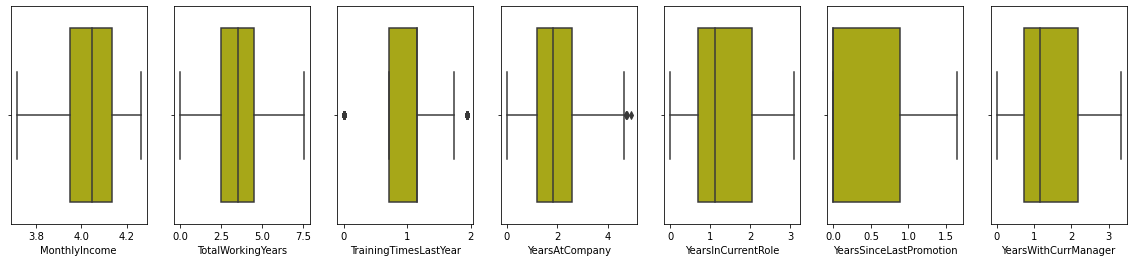

In [17]:
plt.figure(figsize = (20,4))
x = (["",'MonthlyIncome', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
      'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'])
for i in range(1,8):
    plt.subplot(1,7,i)
    sns.boxplot(x = x[i], data=attrition, color = 'y')
plt.show()

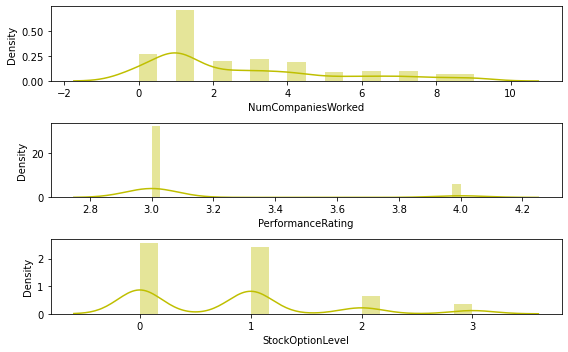

In [18]:
def constant_cols_outliers(cols, df):
    fig, ax = plt.subplots(3,1, figsize = (8, 5))    
    i = 0
    for col in cols:
        sns.distplot(df[col], ax = ax[i], color = 'y')
        i += 1
    fig.tight_layout()
    plt.show()
    
constant_cols_outliers(constant_cols, df)

## Feature encoding

Transform a categorical feature into a numerical feature. <br>
I'm encoding the feature with a label encoder to avoid the curse of dimensionality, which occurs when there are too many features. <br>

In [19]:
labelenc = LabelEncoder()

for i in attrition.select_dtypes(include=['object']):
    attrition[i] = labelenc.fit_transform(attrition[i])

## Remove Features

Let's remove the features which only have one value.

In [20]:
one_value = attrition.nunique()
one_value[one_value==1]

EmployeeCount    1
Over18           1
StandardHours    1
dtype: int64

In [21]:
attrition = attrition.drop(['EmployeeCount','Over18','StandardHours'], axis=1)

Remove `EmployeeNumber` too. This feature is unused.

In [22]:
attrition = attrition.drop(['EmployeeNumber'], axis=1)

In [23]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int32  
 2   BusinessTravel            1470 non-null   int32  
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   int32  
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   int32  
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   int32  
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   int64  
 13  JobRole                   1470 non-null   int32  
 14  JobSatis

## Matrix Correlation

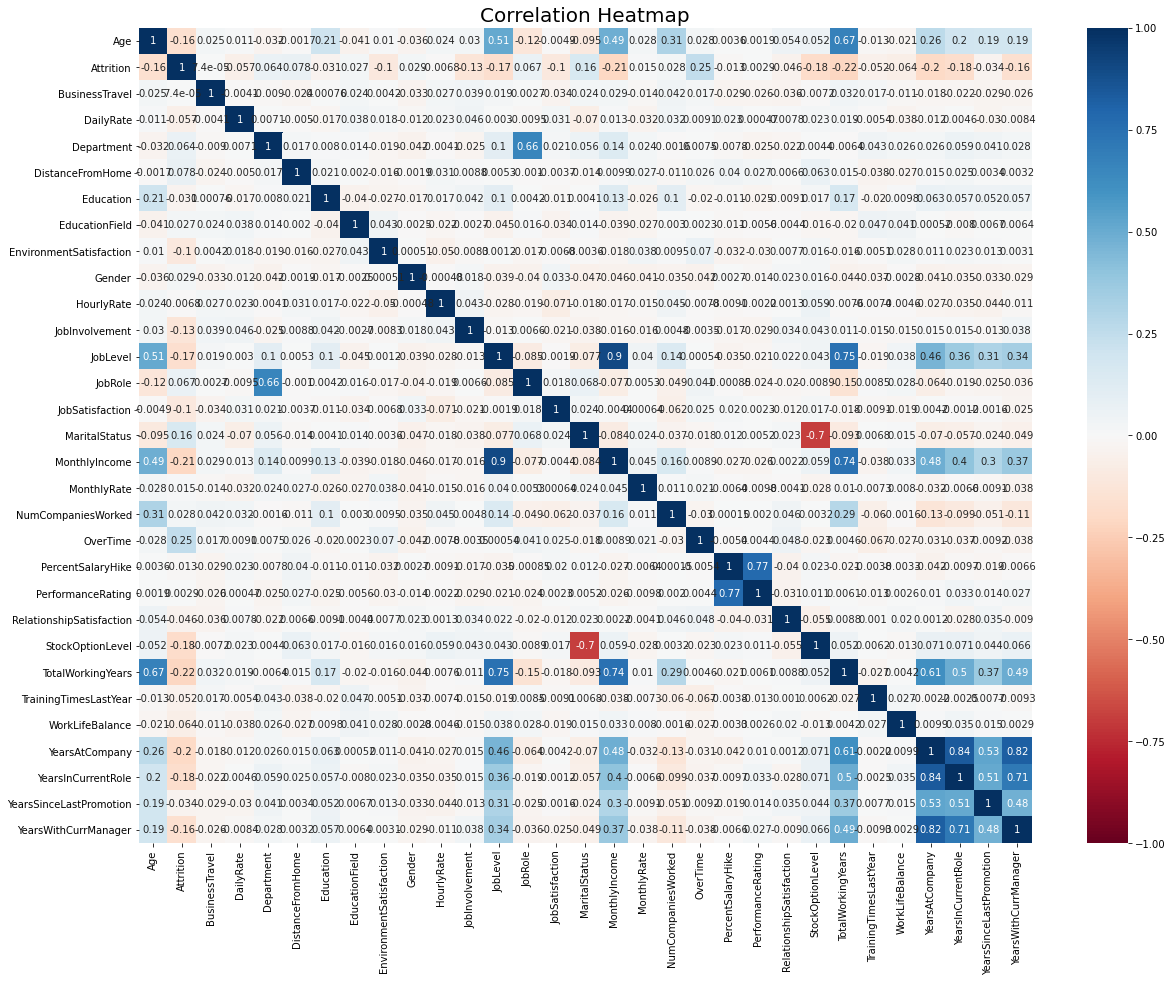

In [24]:
plt.figure(figsize= (20,15)) 
s = sns.heatmap(attrition.corr(), 
            annot = True, 
            cmap = 'RdBu', 
            vmin=-1, 
            vmax=1) 
s.set_yticklabels(s.get_yticklabels(), rotation=0) 
s.set_xticklabels(s.get_xticklabels()) 
plt.title('Correlation Heatmap', fontsize =20) 
#plt.show() 
plt.savefig("Correlation Heatmap.png")

In [25]:
extract_corr = attrition.corr()
extract_corr['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
Gender                      0.029453
NumCompaniesWorked          0.028245
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033592
RelationshipSatisfaction   -0.045872
TrainingTimesLastYear      -0.051867
DailyRate                  -0.056652
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
Age                        -0.159205
YearsWithCurrManager       -0.163686
JobLevel                   -0.169105
YearsInCurrentRole         -0.176056
S

# EDA and Feature Engineering

Initializing new dataframe for EDA

In [26]:
eda = df.copy()

In [27]:
eda.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

**Attrition Rate**

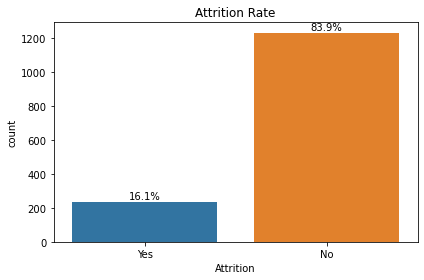

In [28]:
atrate = sns.countplot(x = eda['Attrition'], data = eda)
total = len(eda)
for p in atrate.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    atrate.annotate(percentage, (x, y), ha='center', va='center')
plt.title('Attrition Rate')
plt.tight_layout()
plt.show()

**Attrition Rate per Year**

Obtained by extracting data from the `Attrition` and `YearsAtCompany` features.

In [29]:
map_years_company = {}
for i in eda['YearsAtCompany'].unique():
    map_years_company[i] = 2020 - i

In [30]:
att_yes = eda[eda['Attrition'] == 'Yes']
att_yes.sort_values(by='YearsAtCompany', inplace=True, ascending=False)

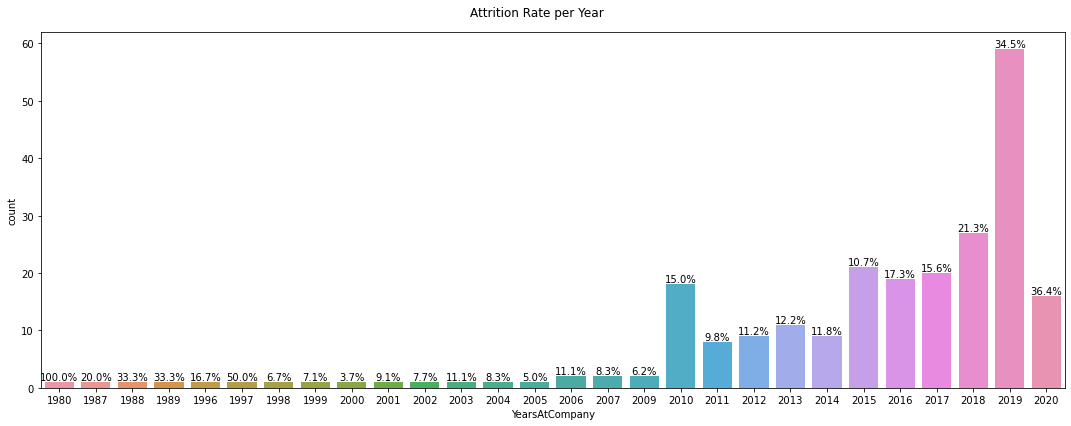

In [31]:
plt.figure(figsize=(15,6))
plt.suptitle('Attrition Rate per Year')
att_per_year = sns.countplot(x=att_yes['YearsAtCompany'].map(map_years_company),data=att_yes)

for i,p in enumerate(att_per_year.patches):
    total = len(eda[eda['YearsAtCompany'] == att_yes['YearsAtCompany'].unique()[i]])
    percentage = f'{100*p.get_height()/total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    att_per_year.annotate(percentage, (x, y), ha='center', va='bottom')
plt.tight_layout()
#plt.show()
plt.savefig("Attrition Rate per Year.png")

I'll segment several columns to make it easier to find patterns and gain insight.

In [32]:
# Age segmentation
def Age(eda):
    eda.loc[eda['Age'] <= 30,'Age'] = 1
    eda.loc[(eda['Age'] > 30) & (eda['Age'] <= 40), 'Age'] = 2
    eda.loc[(eda['Age'] > 40) & (eda['Age'] <= 50), 'Age'] = 3
    eda.loc[(eda['Age'] > 50) & (eda['Age'] <= 60), 'Age'] = 4
    return eda

Age(eda); 

# Distance from home segmentation 
def DistanceFromHome(eda):
    eda.loc[eda['DistanceFromHome'] <= 5,'DistanceFromHome'] = 1
    eda.loc[(eda['DistanceFromHome'] > 5) & (eda['DistanceFromHome'] <= 10), 'DistanceFromHome'] = 2
    eda.loc[(eda['DistanceFromHome'] > 10) & (eda['DistanceFromHome'] <= 15), 'DistanceFromHome'] = 3
    eda.loc[(eda['DistanceFromHome'] > 15) & (eda['DistanceFromHome'] <= 20), 'DistanceFromHome'] = 4
    eda.loc[(eda['DistanceFromHome'] > 20) & (eda['DistanceFromHome'] <= 25), 'DistanceFromHome'] = 5
    eda.loc[(eda['DistanceFromHome'] > 25) & (eda['DistanceFromHome'] <= 30), 'DistanceFromHome'] = 6
    return eda

DistanceFromHome(eda); 

# Monthly income segmentation 
def MonthlyIncome(eda):
    eda.loc[eda['MonthlyIncome'] <= 5000,'MonthlyIncome'] = 1
    eda.loc[(eda['MonthlyIncome'] > 5000) & (eda['MonthlyIncome'] <= 10000), 'MonthlyIncome'] = 2
    eda.loc[(eda['MonthlyIncome'] > 10000) & (eda['MonthlyIncome'] <= 15000), 'MonthlyIncome'] = 3
    eda.loc[eda['MonthlyIncome'] > 15000, 'MonthlyIncome'] = 4
    return eda

MonthlyIncome(eda); 

# Total working years segmentation
def TotalWorkingYears(eda):
    eda.loc[eda['TotalWorkingYears'] <= 10,'TotalWorkingYears'] = 1
    eda.loc[(eda['TotalWorkingYears'] > 10) & (eda['TotalWorkingYears'] <= 20), 'TotalWorkingYears'] = 2
    eda.loc[(eda['TotalWorkingYears'] > 20) & (eda['TotalWorkingYears'] <= 30), 'TotalWorkingYears'] = 3
    eda.loc[eda['TotalWorkingYears'] > 30, 'TotalWorkingYears'] = 4
    return eda

TotalWorkingYears(eda); 

# Years at Company segmentation
def YearsAtCompany(eda):
    eda.loc[eda['YearsAtCompany'] <= 10,'YearsAtCompany'] = 1
    eda.loc[(eda['YearsAtCompany'] > 10) & (eda['YearsAtCompany'] <= 20), 'YearsAtCompany'] = 2
    eda.loc[(eda['YearsAtCompany'] > 20) & (eda['YearsAtCompany'] <= 30), 'YearsAtCompany'] = 3
    eda.loc[eda['YearsAtCompany'] > 30, 'YearsAtCompany'] = 4
    return eda

YearsAtCompany(eda); 

# Years with Current Manager segmentation
def YearsWithCurrManager(eda):
    eda.loc[eda['YearsWithCurrManager'] <= 5,'YearsWithCurrManager'] = 1
    eda.loc[(eda['YearsWithCurrManager'] > 5) & (eda['YearsWithCurrManager'] <= 10), 'YearsWithCurrManager'] = 2
    eda.loc[(eda['YearsWithCurrManager'] > 10) & (eda['YearsWithCurrManager'] <= 15), 'YearsWithCurrManager'] = 3
    eda.loc[eda['YearsWithCurrManager'] > 15, 'YearsWithCurrManager'] = 4
    return eda

YearsWithCurrManager(eda); 

# Daily rate segmentation
def DailyRate(eda):
    eda.loc[eda['DailyRate'] <= 300,'DailyRate'] = 1
    eda.loc[(eda['DailyRate'] > 300) & (eda['DailyRate'] <= 600), 'DailyRate'] = 2
    eda.loc[(eda['DailyRate'] > 600) & (eda['DailyRate'] <= 900), 'DailyRate'] = 3
    eda.loc[(eda['DailyRate'] > 900) & (eda['DailyRate'] <= 1200), 'DailyRate'] = 4
    eda.loc[eda['DailyRate'] > 1200, 'DailyRate'] = 5
    return eda

DailyRate(eda); 

# Hourly Rate segmentation 
def HourlyRate(eda):
    eda.loc[eda['HourlyRate'] <= 50,'HourlyRate'] = 1
    eda.loc[(eda['HourlyRate'] > 50) & (eda['HourlyRate'] <= 75), 'HourlyRate'] = 2
    eda.loc[eda['HourlyRate'] > 75, 'HourlyRate'] = 3
    return eda

HourlyRate(eda); 

# MonthlyRate segmentation 
def MonthlyRate(eda):
    eda.loc[eda['MonthlyRate'] <= 7000,'MonthlyRate'] = 1
    eda.loc[(eda['MonthlyRate'] > 7000) & (eda['MonthlyRate'] <= 12000), 'MonthlyRate'] = 2
    eda.loc[(eda['MonthlyRate'] > 12000) & (eda['MonthlyRate'] <= 17000), 'MonthlyRate'] = 3
    eda.loc[(eda['MonthlyRate'] > 17000) & (eda['MonthlyRate'] <= 22000), 'MonthlyRate'] = 4
    eda.loc[eda['MonthlyRate'] > 22000, 'MonthlyRate'] = 5
    return eda

MonthlyRate(eda); 

# Years In Current Role segmentation
def YearsInCurrentRole(eda):
    eda.loc[eda['YearsInCurrentRole'] <= 4,'YearsInCurrentRole'] = 1
    eda.loc[(eda['YearsInCurrentRole'] > 4) & (eda['YearsInCurrentRole'] <= 8), 'YearsInCurrentRole'] = 2
    eda.loc[(eda['YearsInCurrentRole'] > 8) & (eda['YearsInCurrentRole'] <= 12), 'YearsInCurrentRole'] = 3
    eda.loc[(eda['YearsInCurrentRole'] > 12) & (eda['YearsInCurrentRole'] <= 16), 'YearsInCurrentRole'] = 4
    eda.loc[eda['YearsInCurrentRole'] > 16, 'YearsInCurrentRole'] = 5
    return eda

YearsInCurrentRole(eda); 

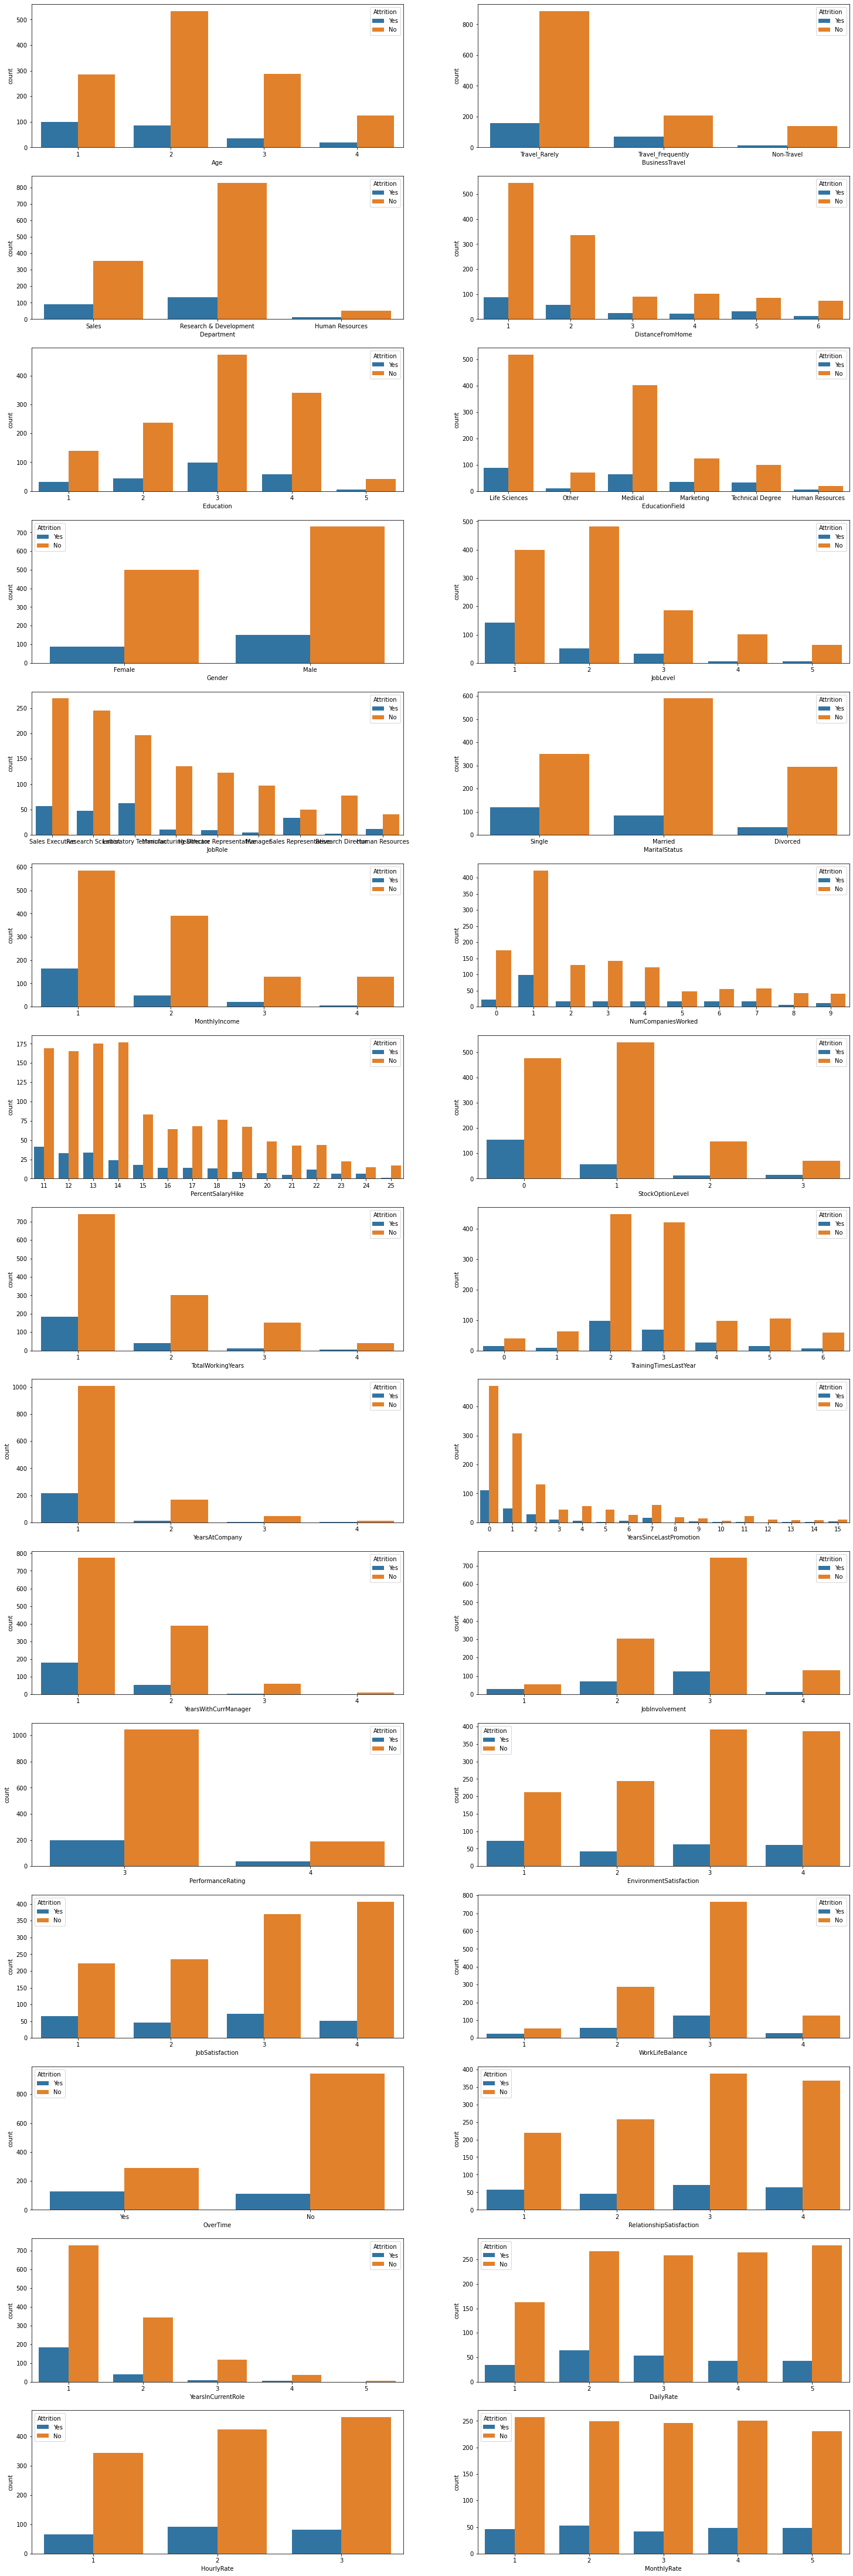

In [33]:
plt.figure(figsize = (25,80))
x = (["","Age", "BusinessTravel", "Department", "DistanceFromHome", 
      "Education", "EducationField", "Gender", "JobLevel", "JobRole", "MaritalStatus", "MonthlyIncome",
      "NumCompaniesWorked", "PercentSalaryHike", "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear",
      "YearsAtCompany", "YearsSinceLastPromotion", "YearsWithCurrManager", "JobInvolvement", "PerformanceRating", 
      "EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance","OverTime","RelationshipSatisfaction",
      "YearsInCurrentRole","DailyRate","HourlyRate","MonthlyRate"])
for i in range(1,31):
    plt.subplot(15,2,i)
    sns.countplot(x = x[i], data=eda, hue="Attrition") #hue : names of variables in data or vector data
    
plt.show()

Here are some key points that I want to highlight.

**Over Time**

Based on the correlation matrix, feature over time has a positive correlation with attrition

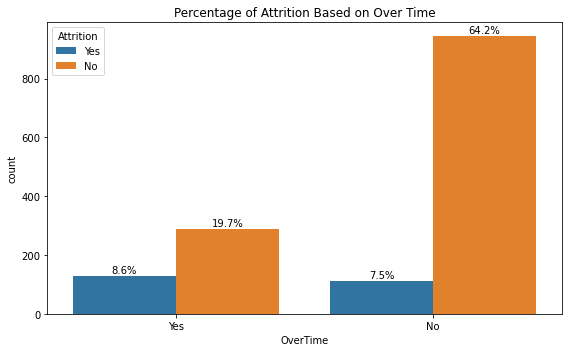

In [34]:
plt.figure(figsize = (8,5))
atrate = sns.countplot(x = eda['OverTime'], hue = eda['Attrition'], data = eda, order = eda['OverTime'].value_counts(ascending=True).index)
total = len(eda)
for p in atrate.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    atrate.annotate(percentage, (x, y), ha='center', va='center')
plt.title('Percentage of Attrition Based on Over Time')
plt.tight_layout()
#plt.show()
plt.savefig("Percentage of Attrition Based on Over Time.png")

**Job Role**

Based on the correlation matrix, Job Role features have a positive correlation with employee attrition

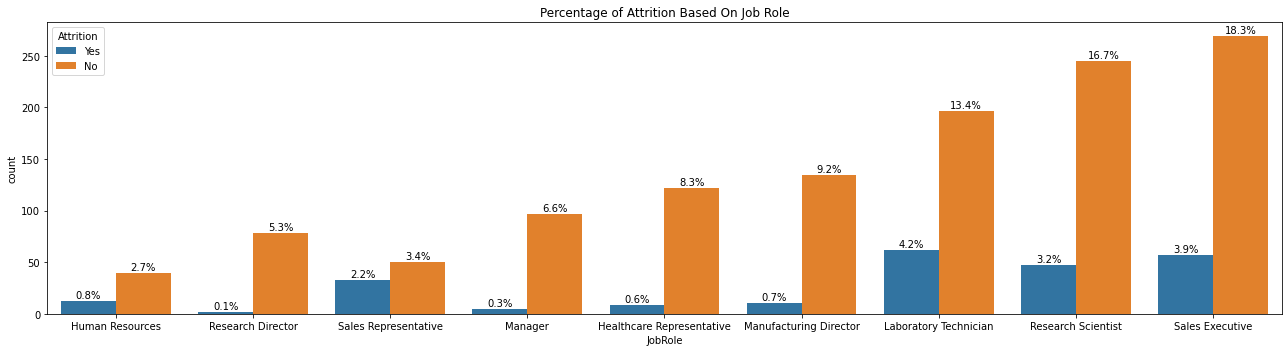

In [35]:
plt.figure(figsize = (18,5))
overate = sns.countplot(x = eda['JobRole'], hue = eda['Attrition'], data = eda, order = eda['JobRole'].value_counts(ascending=True).index)
total = len(eda)
for p in overate.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    overate.annotate(percentage, (x, y), ha='center', va='center')
plt.title('Percentage of Attrition Based On Job Role')
plt.tight_layout()
#plt.show()
plt.savefig("Percentage of Attrition Based On Job Role.png")

**Job Level**

Based on the correlation matrix, job level has a negative correlation to employee attrition

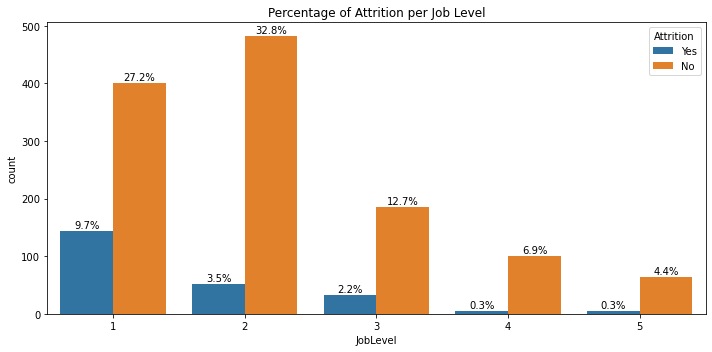

In [36]:
plt.figure(figsize = (10,5))
joblevel = sns.countplot(x = eda['JobLevel'], hue = eda['Attrition'], data = eda)
total = len(eda)
for p in joblevel.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    joblevel.annotate(percentage, (x, y), ha='center', va='center')
plt.title('Percentage of Attrition per Job Level')
plt.tight_layout()
#plt.show()
plt.savefig("Percentage of Attrition Based On Job Level.png")

**Marital Status**

Based on the correlation matrix, feature marital status has a positive correlation with attrition

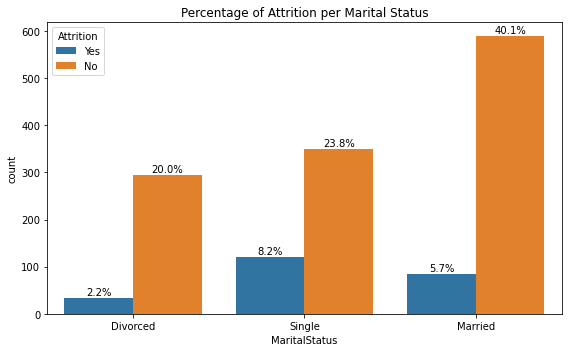

In [37]:
plt.figure(figsize = (8,5))
marital = sns.countplot(x = eda['MaritalStatus'], hue = eda['Attrition'], data = eda, order = eda['MaritalStatus'].value_counts(ascending=True).index)
total = len(eda)
for p in marital.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    marital.annotate(percentage, (x, y), ha='center', va='center')
plt.title('Percentage of Attrition per Marital Status')
plt.tight_layout()
plt.savefig("Percentage of Attrition per Marital Status.png")
#plt.show()

**Department**

Based on the correlation matrix, feature department has a positive correlation with attrition

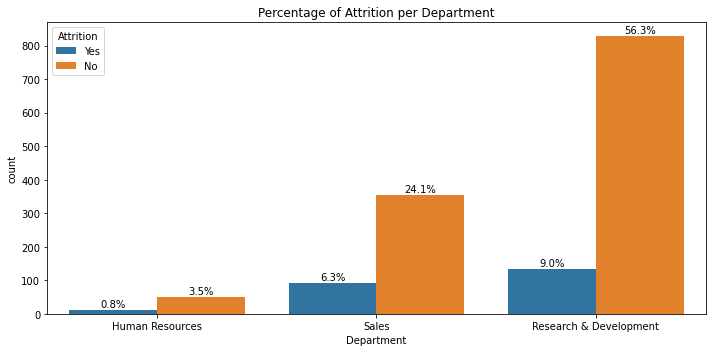

In [38]:
plt.figure(figsize = (10,5))
department = sns.countplot(x = eda['Department'], hue = eda['Attrition'], data = eda, order = eda['Department'].value_counts(ascending=True).index)
total = len(eda)
for p in department.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    department.annotate(percentage, (x, y), ha='center', va='center')
plt.title('Percentage of Attrition per Department')
plt.tight_layout()
#plt.show()
plt.savefig("Percentage of Attrition per Department.png")

**Gender**

Based on the correlation matrix, feature gender has a positive correlation with attrition

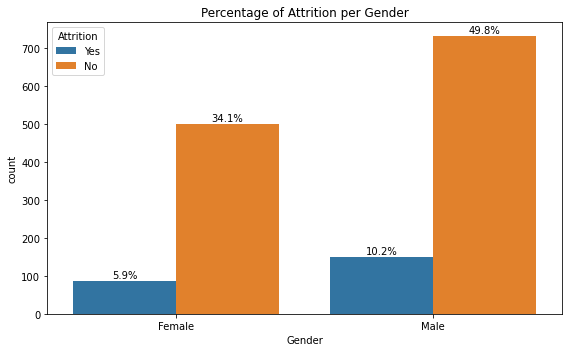

In [39]:
plt.figure(figsize = (8,5))
gender = sns.countplot(x = eda['Gender'], hue = eda['Attrition'], data = eda, order = eda['Gender'].value_counts(ascending=True).index)
total = len(eda)
for p in gender.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    gender.annotate(percentage, (x, y), ha='center', va='center')
plt.title('Percentage of Attrition per Gender')
plt.tight_layout()
#plt.show()
plt.savefig("Percentage of Attrition per Gender.png")

**Monthly Income**

Based on the correlation matrix, feature monthly income has a negative correlation with attrition

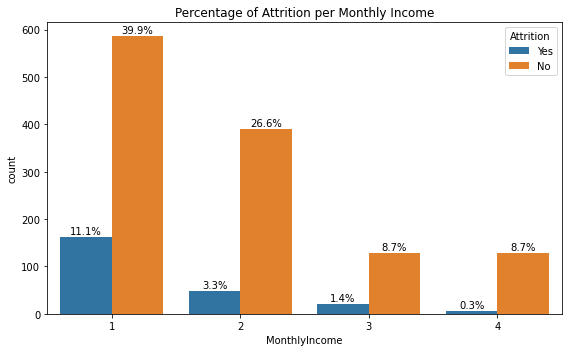

In [40]:
plt.figure(figsize = (8,5))
income = sns.countplot(x = eda['MonthlyIncome'], hue = eda['Attrition'], data = eda)
total = len(eda)
for p in income.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    income.annotate(percentage, (x, y), ha='center', va='center')
plt.title('Percentage of Attrition per Monthly Income')
plt.tight_layout()
#plt.show()
plt.savefig("Percentage of Attrition per Monthly Income.png")

**Years In Current Role**

Based on the correlation matrix, feature years in current role has a negative correlation with attrition

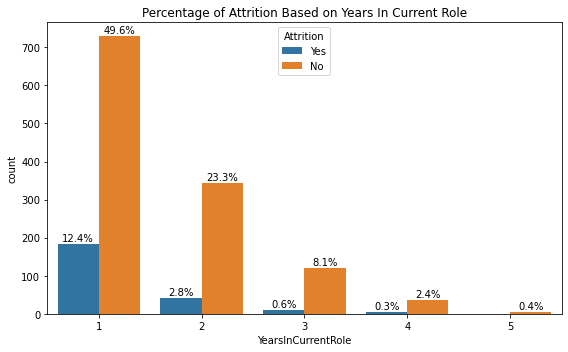

In [41]:
plt.figure(figsize = (8,5))
currole = sns.countplot(x = eda['YearsInCurrentRole'], hue = eda['Attrition'], data = eda)
total = len(eda)
for p in currole.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    currole.annotate(percentage, (x, y), ha='center', va='center')
plt.title('Percentage of Attrition Based on Years In Current Role')
plt.tight_layout()
#plt.show()
plt.savefig("Percentage of Attrition Based on Years In Current Role.png")

**Years Since Last Promotion**

Based on the correlation matrix, feature years since last promotion has a negative correlation with attrition

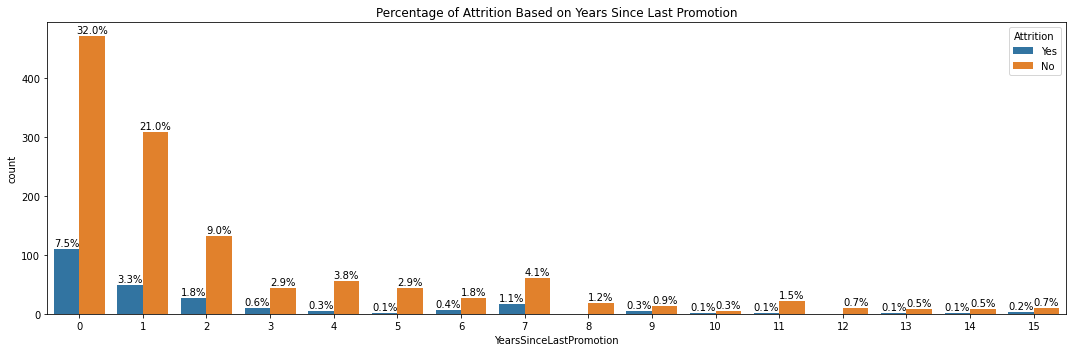

In [42]:
plt.figure(figsize = (15,5))
lastpromot = sns.countplot(x = eda['YearsSinceLastPromotion'], hue = eda['Attrition'], data = eda)
total = len(eda)
for p in lastpromot.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    lastpromot.annotate(percentage, (x, y), ha='center', va='center')
plt.title('Percentage of Attrition Based on Years Since Last Promotion')
plt.tight_layout()
#plt.show()
plt.savefig("Percentage of Attrition Based on Years Since Last Promotion.png")

**Number Companies Worked**

Based on the correlation matrix, feature number companies worked has a positive correlation with attrition

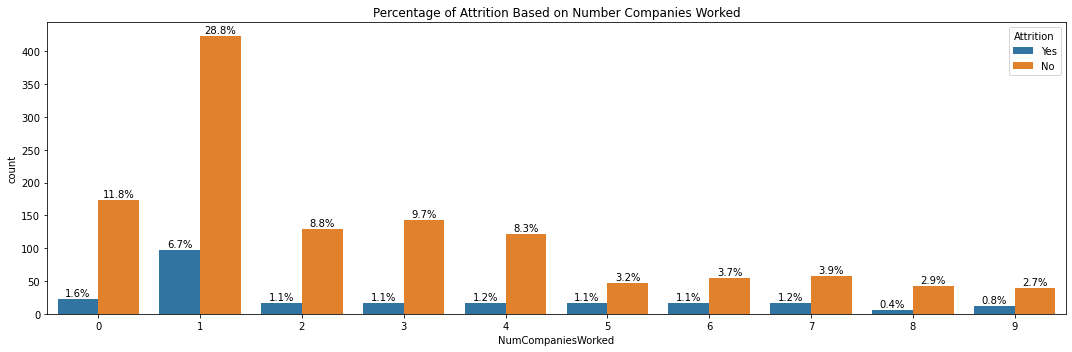

In [43]:
plt.figure(figsize = (15,5))
numcomp = sns.countplot(x = eda['NumCompaniesWorked'], hue = eda['Attrition'], data = eda)
total = len(eda)
for p in numcomp.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    numcomp.annotate(percentage, (x, y), ha='center', va='center')
plt.title('Percentage of Attrition Based on Number Companies Worked')
plt.tight_layout()
#plt.show()
plt.savefig("Percentage of Attrition Based on Number Companies Worked.png")

**Education Field**

Based on the correlation matrix, feature education field has a positive correlation with attrition

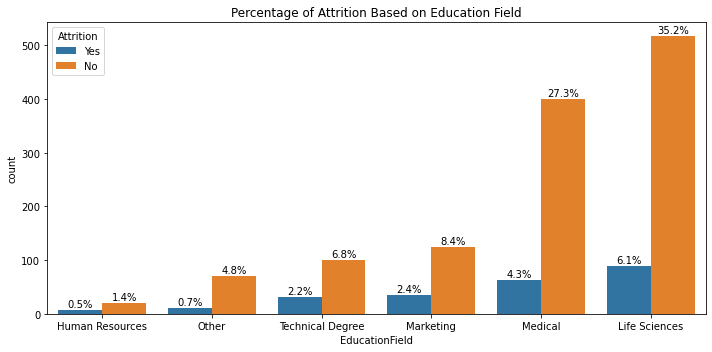

In [44]:
plt.figure(figsize = (10,5))
edufield = sns.countplot(x = eda['EducationField'], hue = eda['Attrition'], data = eda, order = eda['EducationField'].value_counts(ascending=True).index)
total = len(eda)
for p in edufield.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    edufield.annotate(percentage, (x, y), ha='center', va='center')
plt.title('Percentage of Attrition Based on Education Field')
plt.tight_layout()
#plt.show()
plt.savefig("Percentage of Attrition Based on Education Field.png")

**Distance From Home**

Based on the correlation matrix, feature distance from home has a positive correlation with attrition

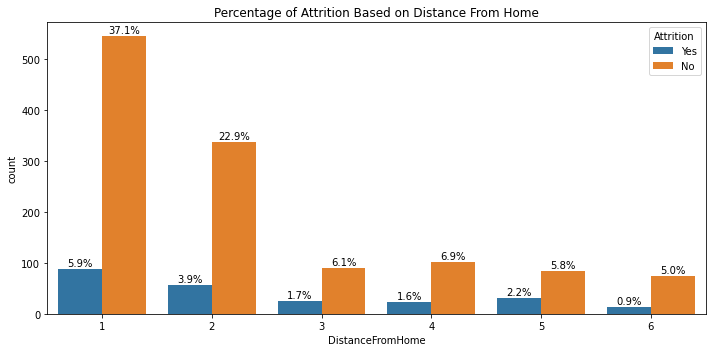

In [45]:
plt.figure(figsize = (10,5))
distance = sns.countplot(x = eda['DistanceFromHome'], hue = eda['Attrition'], data = eda)
total = len(eda)
for p in distance.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    distance.annotate(percentage, (x, y), ha='center', va='center')
plt.title('Percentage of Attrition Based on Distance From Home')
plt.tight_layout()
#plt.show()
plt.savefig("Percentage of Attrition Based on Distance From Home.png")

# Business Insight

* `OverTime` has the highest positive correlation with attrition, while `TotalWorkingYears` has the lowest negative correlation, and `BusinessTravel` has almost no correlation with attrition.
* Overtime employees have a higher rate of attrition than non-overtime employees, according to the `OverTime` feature.
* The Laboratory Technician role has the highest attrition percentage in the `JobRole` feature, while the Research Director role has the lowest.
* Job level 1 has the highest attrition percentage in `JobLevel` features, while job levels 4 and 5 have the lowest attrition percentage.
* The percentage of attrition in married employees is higher than in married and divorced employees, as shown in the `MaritalStatus` feature. Employees who are divorced have the lowest percentage of attrition.
* In the `Department` feature, the highest to lowest attrition percentages are Research & Development, Sales, and Human Resources.
* According to the `Gender` feature, male employees have a higher rate of attrition than female employees.
* In the `MonthlyIncome` feature, the higher the monthly income, the lower the employee attrition percentage. 
* In the `YearsInCurrentRole` feature, the longer the employee is in the current role, the lower the employee attrition percentage. 
* In the `YearsSinceLastPromotion` feature, the highest percentage of employee attrition is 0 years.
* In the `NumCompaniesWorked` feature, the highest percentage of employee attrition is for employees with a number of companies worked of 2 and the lowest percentage is for employees with a number of companies worked of 8. 
* Employees with `Education Field` life science have the highest attrition rate, while employees with human resources education have the lowest attrition percentage. 
* Employees with a `DistanceFromHome` of 1 - 5 have the highest attrition rate, whereas employees with a distance from home of > 25 have the lowest attrition rate.

# Modeling

## Splitting the Data

Separate data for feature and target modeling

In [46]:
X = attrition.drop('Attrition', axis = 1)
y = attrition['Attrition']

For several reasons, we use kfold to split data in modeling.

* Because our dataset is small, if we split it using a simple train/test split (80:20 or 70:30), it is possible that the random sample chosen is not random, and the model's performance (accuracy or other metrics) may be lacking.
* Generally, the model will perform better if more training data is used. This will influence us to use as much data as possible to train the model.
* This kfold method is simpler, and the results are less biased in general, than a simple train/test split.

In [47]:
kf = KFold(n_splits=5, random_state=42, shuffle=True) # Define the split - into 5 folds 

In [48]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

Prior to modeling, the features that will be used are standardized, because:

* Machine learning algorithms will treat all features fairly if the data is of the same scale.
* Data of the same scale will speed up learning algorithms.
* Data with the same scale will make interpreting the ML model easier.

In [49]:
# Dataset standardization
feats = ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(data = X_train, columns = feats)
X_test = pd.DataFrame(data = X_test, columns = feats)

Because the distribution of unique values in our target is skewed, I use the oversampling minority class to handle the dataset (duplicate minority data). If we do not handle the imbalance in this dataset, our ML algorithm will be 'stupid.'

In [50]:
# Balancing dataset (oversampling strategy)
x_over, y_over = SMOTE(sampling_strategy = 'minority', random_state = 42).fit_resample(X_train, y_train)

## Model Evaluation

In [51]:
classifiers = {
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(eval_metric = 'logloss'),
    AdaBoostClassifier()
}

The classification model's evaluation is based on the calculation of the confusion matrix. The confusion matrix results are divided into four categories:
1. True Positive (TP)
2. True Negative (TN)
3. False Positive (FP)
4. False Negative (FN)

The desired (correct) prediction results are TP and TN, while the undesirable and imprecise predictions are FP and FN.

Several metrics are commonly used to evaluate the classification model:
1. Accuracy. When each label has the same importance.
2. Precision. Typically used when focusing on the amount of FP that should be less.
3. Recall. When large FN values are not allowed.
4. F1-score. It is a metric for model evaluation that computes the harmonic mean of Precision and Recall.

I will choose the best model based on the Recall evaluation metric.

In [52]:
model_eval = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

In [53]:
for clf in classifiers:
    clf.fit(x_over, y_over)
    y_test_pred_oversampled = clf.predict(X_test)
    
    model = str(type(clf)).split('.')[-1][:-2]
    
    # Accuracy
    accuracy = round(accuracy_score(y_test, y_test_pred_oversampled),2)
    
    # Precision
    precision = round(precision_score(y_test, y_test_pred_oversampled),2)
    
    # Recall
    recall = round(recall_score(y_test, y_test_pred_oversampled),2)
    
    # F1-Score
    f1 = round(f1_score(y_test, y_test_pred_oversampled),2)
    
    model_eval = model_eval.append({'Model':model,
                                    'Accuracy':accuracy,
                                    'Precision':precision,
                                    'Recall':recall,
                                    'F1-Score':f1},
                                    ignore_index=True)

In [54]:
model_eval

,Model,Accuracy,Precision,Recall,F1-Score
0,RandomForestClassifier,0.84,0.69,0.31,0.43
1,LogisticRegression,0.74,0.42,0.83,0.55
2,XGBClassifier,0.83,0.61,0.34,0.44
3,KNeighborsClassifier,0.63,0.30,0.66,0.41
4,AdaBoostClassifier,0.82,0.55,0.50,0.52
5,DecisionTreeClassifier,0.77,0.42,0.43,0.42


## Tuning Hyperparameters

In [55]:
def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))

In [56]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List hyperparameter yang akan diuji
penalty = ['l2','l1','elasticnet']
C = [0.001, 0.0001, 1] # Inverse of regularization strength; smaller values specify stronger regularization.
hyperparameters = dict(penalty=penalty, C=C)

# Model Inisialization 
logres = LogisticRegression(random_state=42)
tuning_model = GridSearchCV(logres, hyperparameters, cv=5, n_jobs=-1)

# Fitting model and evaluation
tuning_model.fit(x_over, y_over)
y_pred_tuning = tuning_model.predict(X_test)

eval_classification(tuning_model, y_pred_tuning, x_over, y_over, X_test, y_test)

Accuracy (Test Set): 0.74
Precision (Test Set): 0.42
Recall (Test Set): 0.83
F1-Score (Test Set): 0.55


In [57]:
print('Best algorithm:', tuning_model.best_estimator_.get_params()['penalty'])
print('Best C:', tuning_model.best_estimator_.get_params()['C'])

Best algorithm: l2
Best C: 1


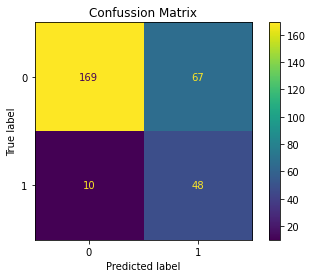

In [58]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

plot_confusion_matrix(tuning_model, X_test, y_test)
plt.title('Confussion Matrix')
#plt.show()
plt.savefig("Distribusi Monetary Pelanggan.png")

## Feature Important

To find out the order of the features that have the most influence on the target label, we can use the important feature.

In [59]:
lr_clf = LogisticRegression()
lr_clf.fit(x_over, y_over)
y_train_pred = lr_clf.predict(x_over)
y_test_pred = lr_clf.predict(X_test)

In [60]:
feature_names = X.columns

In [61]:
w = np.zeros((30,))
w = lr_clf.coef_[0]

In [62]:
import math
feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending = False)
feature_importance.head()

,feature,importance
18,OverTime,2.227200
28,YearsSinceLastPromotion,1.739708
14,MaritalStatus,1.515852
17,NumCompaniesWorked,1.369499
3,Department,1.281584


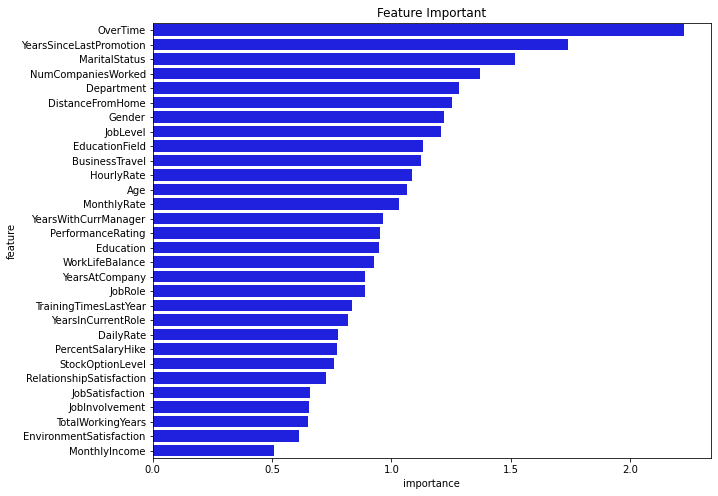

In [63]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
sns.barplot(x='importance', y='feature', color='b',data=feature_importance.reset_index())
plt.title('Feature Important')
plt.savefig("Feature Important.png")

# Model Insight

* According to the model evaluation results, the Logistics Regression model with a Recall-Score of 0.83 is the best classification model for predicting attrition.
* The results of the Logistic Regression model hyperparameter tuning were not different from the results before the hyperparameter tuning. This may be due to the small size of the dataset, possibly cause the results to be insignificant.
* Overtime is the most influential feature on attrition, followed by years since last promotion, marital status, number of companies worked for, and department. Monthly income has the least of an impact on attrition.

# Business Recommendation

Because over time is the most influential factor on employee attrition at Company X, handling over time is a logical step that the company can take to reduce employee attrition. Simulation can be used to determine whether or not handling over time can reduce attrition. Here, the simulation that will be carried out is to reduce the level of employee over time up to 20%. 

## Business Simulation

Simulation will used 20% of the dataset

## Before Simulation

In [64]:
forsim = attrition['Attrition']
forscal = attrition.drop(['Attrition'], axis=1)
featname = forscal.columns

In [65]:
scaling = scaler.transform(forscal)
scaling = pd.DataFrame(data=scaling, columns=featname)
before = pd.concat([forsim, scaling], axis=1)
before.sample(5)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
955,0,2.020380,0.599781,-1.315789,-0.487661,-0.873684,-0.905960,0.584280,1.152484,-1.219122,...,-0.432065,1.152937,0.471114,1.382956,1.555648,0.341342,1.591589,1.258383,1.906519,1.549387
1318,0,-0.874561,-0.900947,-0.588045,-0.487661,1.358829,-1.896117,0.584280,1.152484,0.820263,...,-0.432065,-0.688005,-1.034402,0.179288,0.340992,1.764812,0.883068,1.109347,0.891279,1.421046
1210,0,-0.429185,0.599781,-1.353173,-0.487661,1.482858,0.084197,0.584280,-0.672864,0.820263,...,-0.432065,1.152937,0.471114,0.538970,2.002996,0.341342,1.188667,1.514132,0.387766,1.777549
120,0,-0.763217,-0.900947,1.251253,-0.487661,1.730915,0.084197,-0.909444,-1.585538,0.820263,...,2.314467,0.232466,0.471114,0.045354,-0.583836,-1.082128,0.765259,0.941340,-0.688126,1.280701
859,0,-0.874561,0.599781,0.329112,-0.487661,0.738687,-1.896117,-0.909444,-0.672864,-1.219122,...,-0.432065,-1.608476,0.471114,-0.600616,-0.583836,-1.082128,-0.043411,0.248149,-0.688126,-0.091323


In [66]:
df_before_simulasi = before
n = round(df_before_simulasi.shape[0] * 20/100)
df_before_simulasi = df_before_simulasi.sample(n, random_state=42).reset_index(drop=True)

In [67]:
df_before_simulasi.shape

(294, 31)

In [68]:
X_simulasi = df_before_simulasi.drop('Attrition', axis=1)
y_simulasi = df_before_simulasi['Attrition']

In [69]:
y_simulasi.value_counts()

0    255
1     39
Name: Attrition, dtype: int64

In [70]:
model = LogisticRegression(random_state=42)
model_name = ['Simulasi (Before)']
score_data_simulasi = []

In [71]:
model.fit(x_over,y_over)
y_pred_train = model.predict(x_over)
y_pred_test = model.predict(X_simulasi)

In [72]:
eval_classification(model, y_pred_test, x_over, y_over, X_simulasi, y_simulasi)

Accuracy (Test Set): 0.75
Precision (Test Set): 0.30
Recall (Test Set): 0.64
F1-Score (Test Set): 0.41


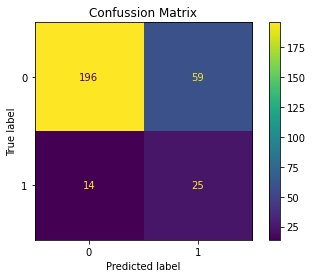

In [73]:
plot_confusion_matrix(model, X_simulasi, y_simulasi)
plt.title('Confussion Matrix')
plt.show()

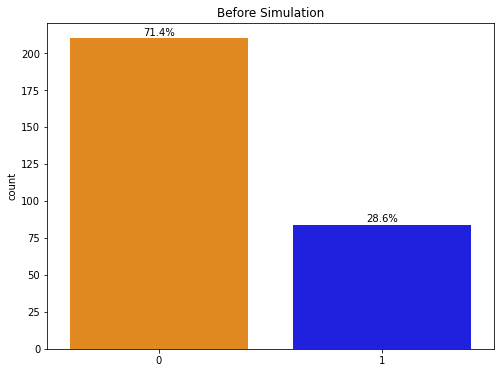

In [74]:
plt.figure(figsize=(8,6))
pal = ['darkorange','blue'] 
ax = sns.countplot(model.predict(X_simulasi), palette = pal)
total1 = len(X_simulasi)

for p in ax.patches:
    percentage = f'{100 * p.get_height() / total1:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() 
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.title('Before Simulation')
plt.savefig("Attrition Rate Before Simulation.png")

## After Simulation

In [75]:
# Simulation using 20% data
df_simulasi_1 = df_before_simulasi.copy()

In [76]:
df_simulasi_1['OverTime'].value_counts()

-0.620612    217
 1.611313     77
Name: OverTime, dtype: int64

In [77]:
# divide the data you want to change by 20% of the sample data (which is overtime = 1)
df_simulasi_over1, df_simulasi_over2 = train_test_split(df_simulasi_1[df_simulasi_1['OverTime'] > 0], test_size=0.2, random_state=42)

In [78]:
# change all overtime data to not overtime
df_simulasi_over2['OverTime'] = -0.620612 

In [79]:
df_simulasi_over = df_simulasi_over1.append(df_simulasi_over2)
df_simulasi_over.shape

(77, 31)

In [80]:
df_simulasi_1 = df_simulasi_over.append(df_simulasi_1[df_simulasi_1['OverTime'] < 0])
df_simulasi_1.shape

(294, 31)

In [81]:
X_simulasi1 = df_simulasi_1.drop('Attrition', axis=1)
y_simulasi1 = df_simulasi_1['Attrition']

In [82]:
model.fit(x_over,y_over)
y_pred_train = model.predict(x_over)
y_pred_test = model.predict(X_simulasi1)

In [83]:
eval_classification(model, y_pred_test, x_over, y_over, X_simulasi1, y_simulasi1)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.30
Recall (Test Set): 0.59
F1-Score (Test Set): 0.40


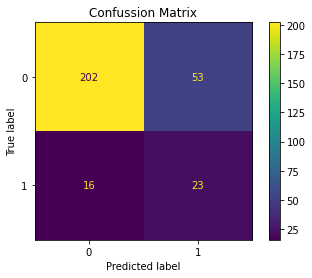

In [84]:
plot_confusion_matrix(model, X_simulasi1, y_simulasi1)
plt.title('Confussion Matrix')
plt.show()

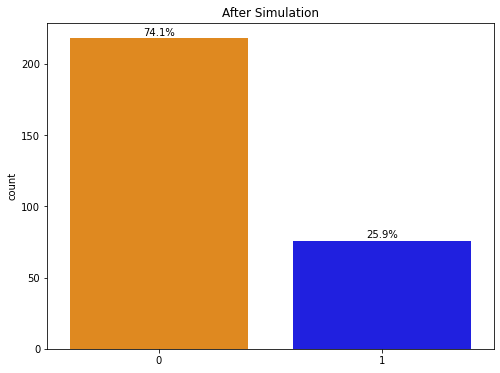

In [85]:
plt.figure(figsize=(8,6))

ax = sns.countplot(model.predict(X_simulasi1), palette = pal)
total1 = len(X_simulasi)

for p in ax.patches:
    percentage = f'{100 * p.get_height() / total1:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() 
    ax.annotate(percentage, (x, y), ha='center', va='center')
    
plt.title('After Simulation')
plt.savefig("Attrition Rate After Simulation.png")

As shown in the simulation results, the previously 28.6 percent attrition rate has dropped to 25.9 percent. The attrition rate decreased by 2.7 percent.